Embedded methods combine the qualities’ of filter and wrapper methods. It’s implemented by algorithms that have their own built-in feature selection methods.

Some of the most popular examples of these methods are LASSO and RIDGE regression which have inbuilt penalization functions to reduce overfitting.


*   Lasso regression performs L1 regularization which adds penalty equivalent to absolute value of the magnitude of coefficients.
*   Ridge regression performs L2 regularization which adds penalty equivalent to square of the magnitude of coefficients.

Other examples of embedded methods are Regularized trees, Memetic algorithm, Random multinomial logit.

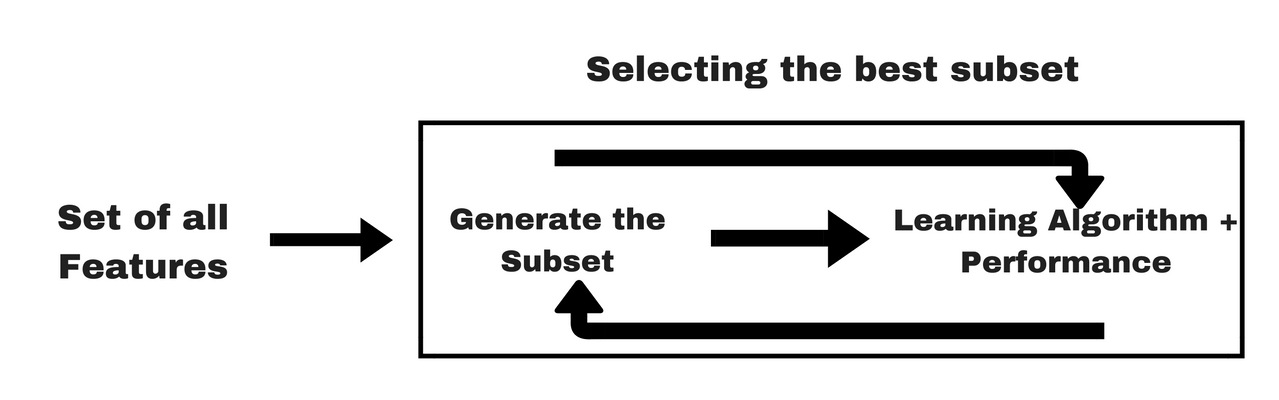

In [18]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine
from sklearn.feature_selection import SelectFromModel

In [19]:
data = load_wine()

In [20]:
x = pd.DataFrame(data.data)
x.columns = data.feature_names

y = pd.Series(data.target)

In [21]:
selector = SelectFromModel(estimator= RandomForestClassifier(n_estimators= 100, random_state= 0, n_jobs= -1)).fit(x, y)

In [22]:
selector.threshold_

0.07692307692307693

In [23]:
selector.estimator_.feature_importances_

array([0.11070045, 0.04218641, 0.01123226, 0.02289314, 0.03511998,
       0.03851999, 0.16095401, 0.01343742, 0.02625452, 0.14526674,
       0.08968972, 0.10974653, 0.19399883])

In [24]:
selector.get_support()

array([ True, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])

In [25]:
features_to_select = []
for i in range(len(x.columns)):
  if selector.get_support()[i] == True:
    features_to_select.append(x.columns[i])


In [26]:
features_to_select

['alcohol',
 'flavanoids',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']